## Error Analysis

In [48]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df_svm = pd.read_csv('/Users/liki/neuefische/Respiratory_Disease_Classification/data/misclassified_svm.csv')
df_resnet = pd.read_csv('/Users/liki/neuefische/Respiratory_Disease_Classification/data/misclassified_testset_ResNet.csv')

In [55]:
# df_svm['filename'] = df_svm['filename'].apply(lambda x: x[2:6])
# df_svm['filename'] = df_svm['filename'].apply(lambda x: x.replace('_',''))
df_svm.head()

,Unnamed: 0,filename,actual,pred
0,6,i194,1,0
1,7,i194,1,0
2,10,f73,1,0
3,11,i194,1,0
4,15,i171,1,0


In [56]:
df_svm['filename'].value_counts()

i194    34
i224    34
i144    31
i171    17
i102    17
i136    17
i123    17
i126    16
i202    16
i214    16
i143    14
i187    11
f85     11
i225     9
f99      7
i182     6
f82      6
f72      5
f63      5
f80      4
f69      4
f101     3
f73      3
f64      3
i223     2
f55      2
i109     2
i185     1
i150     1
f87      1
i195     1
i211     1
f75      1
i160     1
Name: filename, dtype: int64

In [57]:
file_svm = df_svm['filename'].unique()
file_svm.shape

(34,)

In [58]:
# df_resnet['filename'] = df_resnet['filename'].apply(lambda x: x[4:8])
# df_resnet['filename'] = df_resnet['filename'].apply(lambda x: x.replace('\'',''))

df_resnet.tail(20)
file_rn = df_resnet['filename'].unique()
file_rn.shape
df_resnet.filename.value_counts()

(42,)

In [21]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

print(len(intersection(file_rn, file_svm)))
intersection(file_rn, file_svm)

28


['f101',
 'f55',
 'f63',
 'f64',
 'f69',
 'i109',
 'i150',
 'i160',
 'i185',
 'i195',
 'i211',
 'i223',
 'f72',
 'f85',
 'f99',
 'i102',
 'i126',
 'i136',
 'i143',
 'i144',
 'i171',
 'i182',
 'i187',
 'i194',
 'i202',
 'i214',
 'i224',
 'i225']

In [61]:
df_anno = pd.read_csv('/Users/liki/neuefische/Respiratory_Disease_Classification/data/annotations.csv')
df_anno.head()

,Unnamed: 0,id,diagnosis,train_test,filename,is_healthy
0,0,i101,urti,test,101_1b1_Al_sc_Meditron.wav,0
1,1,i101,urti,test,101_1b1_Pr_sc_Meditron.wav,0
2,2,i102,healthy,test,102_1b1_Ar_sc_Meditron.wav,1
3,3,i103,asthma,train,103_2b2_Ar_mc_LittC2SE.wav,0
4,4,i104,copd,test,104_1b1_Al_sc_Litt3200.wav,0


In [62]:
df_anno[df_anno.train_test=='test'].id.nunique()

57

In [63]:
data_test = joblib.load('spectrogram_test_80x80px.pkl')
files = pd.DataFrame(data_test["filename"], columns = ["filename"])
files

,filename
0,1_f75_4496.png
1,1_f75_4482.png
2,1_f82_4706.png
3,1_f75_4469.png
4,1_f87_4917.png
...,...
1627,0_i178_2257.png
1628,0_i176_2100.png
1629,0_i176_2114.png
1630,0_i178_2243.png


In [64]:
files["filename"] = files["filename"].apply(lambda x: x[2:6])
files["filename"] = files["filename"].apply(lambda x: x.replace('_',''))

files

,filename
0,f75
1,f75
2,f82
3,f75
4,f87
...,...
1627,i178
1628,i176
1629,i176
1630,i178


In [69]:
chunks_re = pd.DataFrame(df_resnet.filename.value_counts())
chunks_re.columns = ['resnet']
chunks_svm = pd.DataFrame(df_svm.filename.value_counts())
chunks_svm.columns = ['svm']
chunks_tot = pd.DataFrame(files.filename.value_counts())
chunks_tot.columns = ['tot']

In [90]:
err_resnet = chunks_re.join(chunks_tot)
err_resnet['perc'] = err_resnet['resnet']/err_resnet['tot'] * 100
err_resnet = err_resnet.sort_values(by='perc', ascending=False).join(df_resnet.iloc[:,1:-1].set_index('filename'), how='inner').drop_duplicates().sort_values(by='perc', ascending=False)
err_resnet[err_resnet.perc>50]

,resnet,tot,perc,y
i202,16,16,100.000000,1
i194,31,34,91.176471,1
f64,9,12,75.000000,0
i144,24,33,72.727273,1
i214,11,16,68.750000,1
i150,2,3,66.666667,0
i185,13,20,65.000000,0
i109,12,20,60.000000,0
i195,14,24,58.333333,0


In [91]:
err_svm = chunks_svm.join(chunks_tot)
err_svm['perc'] = err_svm['svm']/err_svm['tot'] * 100
err_svm = err_svm.join(df_svm.iloc[:,1:-1].set_index('filename'), how='inner').drop_duplicates().sort_values(by='perc', ascending=False)
err_svm[err_svm.perc>50]

,svm,tot,perc,actual
i202,16,16,100.000000,1
i194,34,34,100.000000,1
i102,17,17,100.000000,1
i126,16,17,94.117647,1
i144,31,33,93.939394,1
i143,14,17,82.352941,1
i187,11,17,64.705882,1
f63,5,9,55.555556,0
i225,9,17,52.941176,1
f85,11,21,52.380952,1


i202 100% misclassification rate
i224
i194
i214


## Use Lime to interpret

In [24]:
from lime import lime_image
import keras
import time
import tensorflow as tf

import sys
sys.path.insert(1, '../../data/cloud')
import predict
import preprocess

In [199]:
explainer = lime_image.LimeImageExplainer()
preprocessor = preprocess.AudioPreprocessor()

In [200]:
model_path = '/Users/liki/neuefische/Respiratory_Disease_Classification/data/models/ResNet.h5'
model = keras.models.load_model(model_path, compile=False)
predictor = predict.MyPredictor(model, preprocessor)

In [201]:
def load_dataset(folder, batch_size = 32, training=True, image_size = (224, 224), rseed = 8):
    # We create a TensorFlow Dataset from the list of files.
    # This dataset does not load the data into memory, but instead
    # pulls batches one after another.
    dataset = tf.keras.utils.image_dataset_from_directory(
    folder,
    validation_split=None,
    shuffle = False,
    image_size=IMG_SIZE,
    batch_size=None)
    
    img, lbl = tuple(zip(*dataset))

    file_paths = dataset.file_paths
    y_patient = ['_'.join(x.split('/')[-1].split('_')[0:2]) for x in file_paths] # -> 0_f1
    file_tensor = tf.convert_to_tensor(y_patient)

    indices = tf.range(start=0, limit=tf.shape(lbl)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices, seed = rseed)

    shuffled_x = tf.gather(img, shuffled_indices)
    shuffled_y = tf.gather(lbl, shuffled_indices)
    shuffled_files = tf.gather(y_patient, shuffled_indices)

    dataset = tf.data.Dataset.from_tensor_slices((shuffled_x,shuffled_y))

    if training:

        y_size = len(shuffled_y)
        weight_0 = np.sum(shuffled_y)/ y_size
        weight_1 = 1 - weight_0
        print(weight_0)
        class_weights = { 0 : 2 * weight_0 , 1 : 2.25 * weight_1}


        dataset = dataset.map(data_augmentation)
        #dataset = tf.data.Dataset.from_tensor_slices(dataset)
        dataset = dataset.\
            repeat(count=None) # Infinite iterations
    else: 
        # Evaluation or testing
        class_weights = None
        y_size = len(shuffled_y)
        dataset = dataset.\
            repeat(count=1) # One iteration
            
    # The dataset will produce batches of BATCH_SIZE and will
    # automatically prepare an optimized number of batches while the prior one is
    # trained on.
    return dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE), shuffled_files, class_weights, y_size

In [202]:
batch_size = 32
test_dir = '../../data/images/error_ana'
test_ds, test_files, _, _ = load_dataset(test_dir, batch_size = 32, training=False, rseed = 4)

Found 23 files belonging to 2 classes.


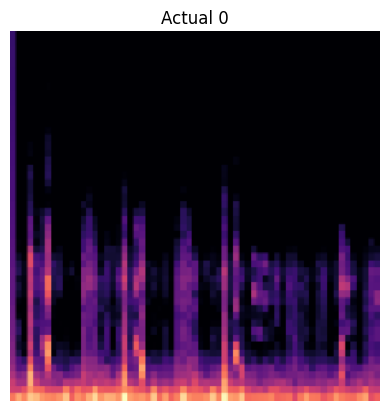

In [194]:
for images, labels in test_ds.take(5):
    labels = labels.numpy()
    i = 1
    # for i in range(1):
        # ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(f'Actual {labels[i]}')


In [195]:
img = images[i].numpy().astype("uint8")

In [196]:
explanation = explainer.explain_instance(
                img,
                model.predict,top_labels=2, hide_color=None,
                num_samples=1000
                )

  0%|          | 0/1000 [00:00<?, ?it/s]

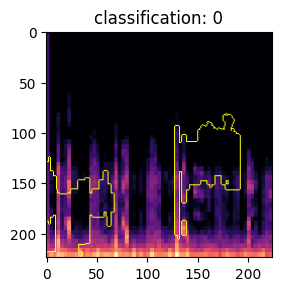

In [197]:
from skimage.segmentation import mark_boundaries
ind =  explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                            positive_only=True, num_features=3, 
                                            hide_rest=False)
plt.subplot(121)
plt.imshow(mark_boundaries(temp, mask))
plt.title(f'classification: {ind}')



dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
# plt.subplot(122)
# plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
# plt.colorbar()
# # plt.title(f'classification: {ind}')


Text(0.5, 1.0, 'classification: 0')

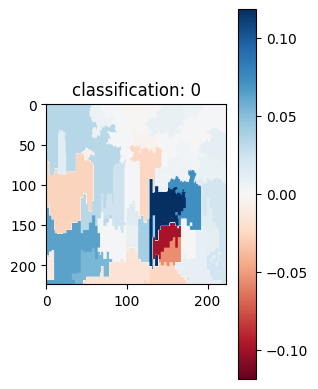

In [198]:
#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.subplot(121)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.title(f'classification: {ind}')